In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # for plot styling
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = r"/content/drive/MyDrive/Project & Research /ISCAS-similarity/Clean Datased/final.csv"
data=pd.read_csv(path)

In [ ]:
data=data.drop(columns=["Unnamed: 0"],axis=1)

In [ ]:
data

,description_x,description_y,Check,"Dx,Dy",Cos_sim_bow,Shepard_sim_bow,Min_Max_sim_bow,Cos_sim_TI,Shepard_sim_TI,Min_Max_sim_TI
0,first trust dow jones internet,first trust dj internet idx,1,"['first trust dow jones internet', 'first trus...",0.600000,0.135335,0.428571,0.431613,0.344316,0.347953
1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,1,"['schwab intl large company index etf', 'schwa...",0.680414,0.106878,0.500000,0.527072,0.378117,0.348840
2,vanguard small cap index adm,vanguard small-cap index fund inst,0,"['vanguard small cap index adm', 'vanguard sma...",0.730297,0.176921,0.571429,0.580333,0.400056,0.442176
3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,1,['duke energy corp new com new isin #us4 sedol...,0.833333,0.135335,0.666667,0.716812,0.471149,0.587291
4,visa inc class a,visa inc.,1,"['visa inc class a', 'visa inc.']",0.816497,0.367879,0.666667,0.709297,0.466499,0.473355
...,...,...,...,...,...,...,...,...,...,...
2137,delta air lines inc com,delta air lines inc dela new,1,"['delta air lines inc com', 'delta air lines i...",0.730297,0.176921,0.571429,0.580333,0.400056,0.442176
2138,cognizant tech solutns a,cognizant tech solutions corp,1,"['cognizant tech solutns a', 'cognizant tech s...",0.577350,0.176921,0.400000,0.411207,0.337846,0.286638
2139,pimco investment grade corporate bond fund - c...,fid conservative income bond fund,0,['pimco investment grade corporate bond fund -...,0.338062,0.059106,0.200000,0.206137,0.283640,0.136641
2140,eli lilly & co com,lilly eli &co com npv,1,"['eli lilly & co com', 'lilly eli &co com npv']",0.894427,0.367879,0.800000,0.818180,0.547154,0.635489


In [ ]:

data.describe()

,Check,Cos_sim_bow,Shepard_sim_bow,Min_Max_sim_bow,Cos_sim_TI,Shepard_sim_TI,Min_Max_sim_TI
count,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000
mean,0.753035,0.578507,0.186736,0.430630,0.454170,0.380152,0.326479
std,0.431347,0.235390,0.161536,0.229155,0.237392,0.128207,0.200964
min,0.000000,0.000000,0.016194,0.000000,0.000000,0.243117,0.000000
25%,1.000000,0.408248,0.086338,0.250000,0.260556,0.296385,0.176089
50%,1.000000,0.612372,0.135335,0.400000,0.450176,0.350413,0.286638
75%,1.000000,0.755929,0.243117,0.600000,0.632790,0.424441,0.442176
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Seperating the similarity values in table
CS_TI=data.filter(["Check","Cos_sim_TI"], axis=1)
CS_TI

,Check,Cos_sim_TI
0,1,0.431613
1,1,0.527072
2,0,0.580333
3,1,0.716812
4,1,0.709297
...,...,...
2137,1,0.580333
2138,1,0.411207
2139,0,0.206137
2140,1,0.818180


Preprocessing and graphs 


k- Nearest Neighborhood Evaluation

In [ ]:
# nomalizing the the similarities

# libraries for preprocessing 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# libraries for K NN classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X=CS_TI["Cos_sim_TI"]
y=CS_TI['Check']
X1=X[np.newaxis,:]
y1=y[np.newaxis,:]
X1=X1.reshape(-1,1)
y1=y1.reshape(-1,1)

In [ ]:
X1 =StandardScaler().fit(X1).transform(X1.astype(float))
X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.2, random_state=4)

Minimum error:- 0.29572758244086916 at K = 35


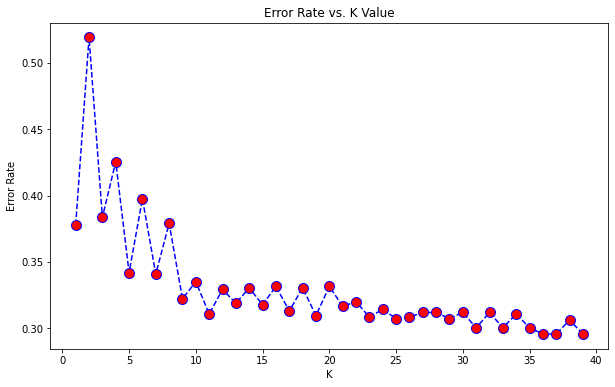

In [ ]:
# to find optimal value of k 

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
# ploting accuracy Vs K values
def get_K(XX_train,XX_test,yy_train,yy_test):
  acc = []
  # Will take some time
  from sklearn import metrics
  for i in range(1,40):
      neigh = KNeighborsClassifier(n_neighbors = i).fit(XX_train,yy_train)
      yhat = neigh.predict(XX_test)
      acc.append(metrics.accuracy_score(yy_test, yhat))

  #print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
  Max=max(acc)
  p=acc.index(Max)
  """
  plt.figure(figsize=(10,6))
  plt.plot(range(1,40),acc,color = 'yellow',linestyle='dashed', 
          marker='*',markerfacecolor='black', markersize=10)
  plt.title('accuracy vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Accuracy')"""
  return p

In [ ]:
X=CS_TI["Cos_sim_TI"]
y=CS_TI['Check']
X1=X[np.newaxis,:]
y1=y[np.newaxis,:]
X1=X1.reshape(-1,1)
y1=y1.reshape(-1,1)

X1 =StandardScaler().fit(X1).transform(X1.astype(float))
X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.2, random_state=4)
k=get_K(X_train,X_test,y_train,y_test)
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at k is",metrics.accuracy_score(y_test, Pred_y))
print("Value of K :",k)

Accuracy of model at k is 0.7715617715617715
Value of K : 14


In [ ]:
CS_TI

,Check,Cos_sim_TI
0,1,0.431613
1,1,0.527072
2,0,0.580333
3,1,0.716812
4,1,0.709297
...,...,...
2137,1,0.580333
2138,1,0.411207
2139,0,0.206137
2140,1,0.818180


In [ ]:
mean_0,mean_1 =0.296672,0.503103
incr = (mean_1 - mean_0) /100
print(incr)
alpha_list=[]
for i in range(100):
  alpha_list.append(mean_0 + i* incr)
print(alpha_list)


0.0020643099999999998
[0.296672, 0.29873631, 0.30080061999999996, 0.30286493, 0.30492924, 0.30699355, 0.30905786, 0.31112217, 0.31318648, 0.31525079, 0.31731509999999996, 0.31937941, 0.32144372, 0.32350803, 0.32557234, 0.32763665, 0.32970096, 0.33176527, 0.33382957999999996, 0.33589389, 0.3379582, 0.34002251, 0.34208682, 0.34415112999999997, 0.34621544, 0.34827975, 0.35034405999999996, 0.35240836999999997, 0.35447268, 0.35653699, 0.3586013, 0.36066560999999997, 0.36272992, 0.36479423, 0.36685853999999996, 0.36892284999999997, 0.37098716, 0.37305147, 0.37511578, 0.37718008999999997, 0.3792444, 0.38130871, 0.38337301999999995, 0.38543732999999997, 0.38750164, 0.38956595, 0.39163026, 0.39369456999999997, 0.39575888, 0.39782319, 0.39988749999999995, 0.40195180999999996, 0.40401612, 0.40608043, 0.40814474, 0.41020904999999996, 0.41227336, 0.41433767, 0.41640197999999995, 0.41846628999999996, 0.4205306, 0.42259491, 0.42465922, 0.42672352999999996, 0.42878784, 0.43085215, 0.43291645999999995,

In [ ]:
# making new function make new target variables
def new_labels(measure,threshold):
  if measure > threshold:
    return measure
  else:
    return 0
count = 1
for j in alpha_list:
  CS_TI[count]=CS_TI['Cos_sim_TI'].apply(lambda x:new_labels(x,j))  
  count +=1
  
CS_TI

,Check,Cos_sim_TI,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,1,0.431613,0.431613,0.431613,0.431613,0.431613,0.431613,0.431613,0.431613,0.431613,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.527072,0.527072,0.527072,0.527072,0.527072,0.527072,0.527072,0.527072,0.527072,...,0.527072,0.527072,0.527072,0.527072,0.527072,0.527072,0.527072,0.527072,0.527072,0.527072
2,0,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,...,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333
3,1,0.716812,0.716812,0.716812,0.716812,0.716812,0.716812,0.716812,0.716812,0.716812,...,0.716812,0.716812,0.716812,0.716812,0.716812,0.716812,0.716812,0.716812,0.716812,0.716812
4,1,0.709297,0.709297,0.709297,0.709297,0.709297,0.709297,0.709297,0.709297,0.709297,...,0.709297,0.709297,0.709297,0.709297,0.709297,0.709297,0.709297,0.709297,0.709297,0.709297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,1,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,...,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333,0.580333
2138,1,0.411207,0.411207,0.411207,0.411207,0.411207,0.411207,0.411207,0.411207,0.411207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2139,0,0.206137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2140,1,0.818180,0.818180,0.818180,0.818180,0.818180,0.818180,0.818180,0.818180,0.818180,...,0.818180,0.818180,0.818180,0.818180,0.818180,0.818180,0.818180,0.818180,0.818180,0.818180


In [ ]:
acc=[]
for i in range(1,101):
  X=CS_TI[i]
  y=CS_TI['Check']
  X1=X[np.newaxis,:]
  y1=y[np.newaxis,:]
  X1=X1.reshape(-1,1)
  y1=y1.reshape(-1,1)

  X1 =StandardScaler().fit(X1).transform(X1.astype(float))
  X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.2, random_state=4)
  k=get_K(X_train,X_test,y_train,y_test)
  #k=14
  #Train Model and Predict
  neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
  Pred_y = neigh.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, Pred_y))
  #print("Accuracy of model at k is",metrics.accuracy_score(y_test, Pred_y))


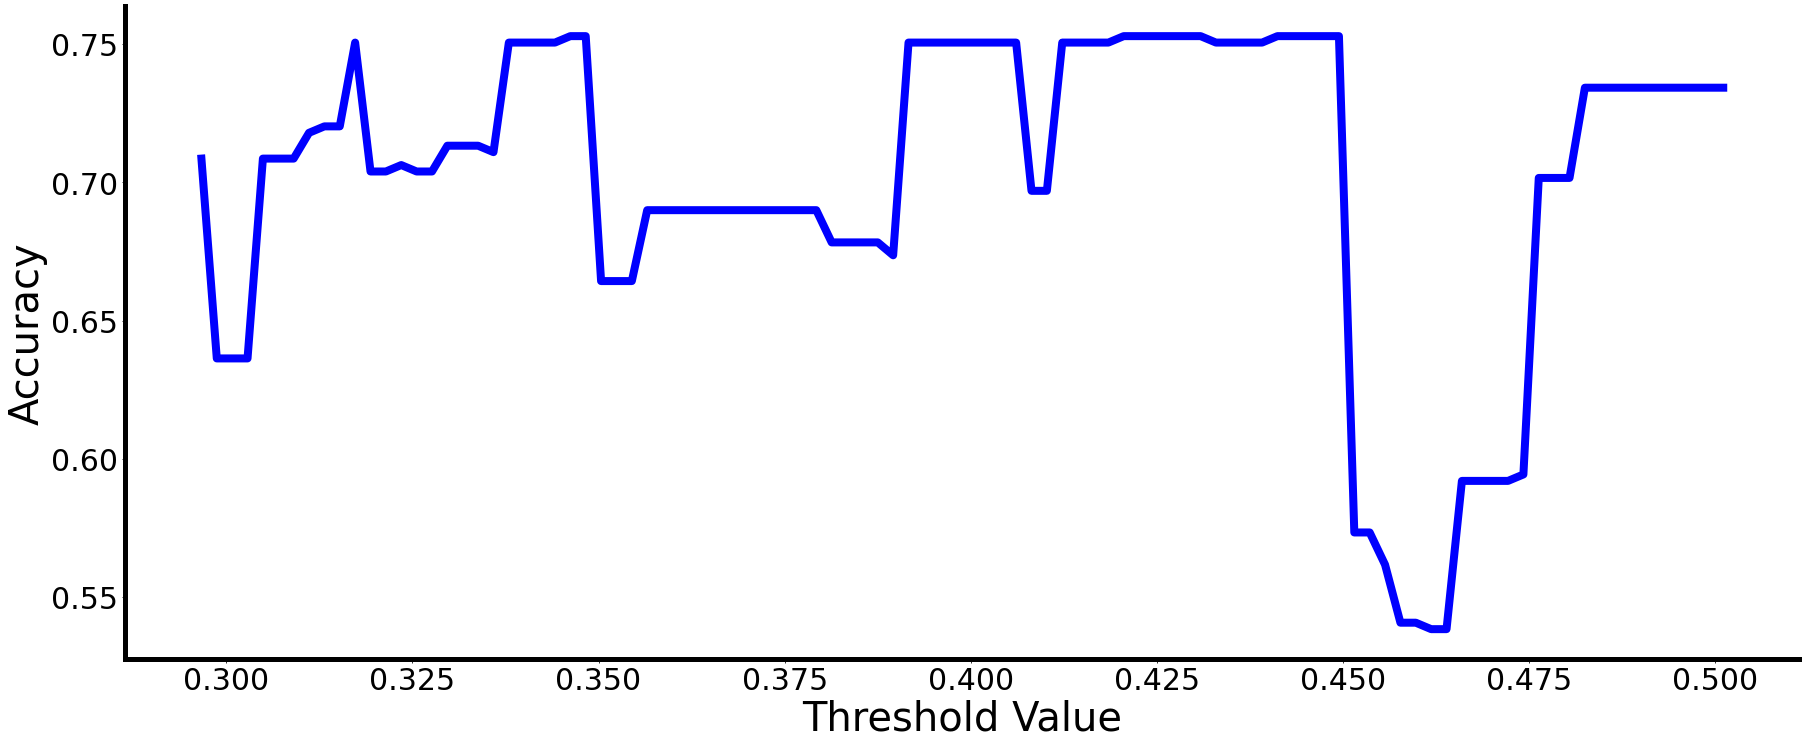

In [ ]:
plt.rcParams.update({'font.size': 30,'axes.edgecolor' : "black" ,"axes.linewidth":5})

plt.figure(figsize=(30,12))
plt.plot(alpha_list,acc,color='blue', linestyle='solid', 
         marker='',markerfacecolor='', markersize=10,linewidth=8.0) 
#plt.title('Accuracy vs. Threshold Value of Shepard Similarity Using TF-IDF feature')
plt.xlabel('Threshold Value',fontsize=40)
plt.ylabel('Accuracy',fontsize=40)
sns.despine()
plt.show()